In [1]:
import matplotlib.pyplot as plt
from torchinfo import summary
from torchview import draw_graph
import torch


from src.models.dummy import DummyModel
from src.models.resnet import ResnetLikeV1
from src.models.densenet import DensenetLikeV1



In [2]:
class LSTM_LIKE(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lstm1 = torch.nn.LSTM(3, 10, batch_first=True)
        # self.lstm1 = torch.nn.Linear(3, 10)
        self.lstm2 = torch.nn.LSTM(10, 20, batch_first=True)
        # self.lstm2 = torch.nn.Linear(10, 20)

        self.linear1 = torch.nn.Linear(3, 2)
        self.linear2 = torch.nn.Linear(2, 20)
        
        self.relu = torch.nn.ReLU()
        self.flatten = torch.nn.Flatten()
        self.final = torch.nn.Linear(40, 1)
        
    def forward(self, x):
        # lstm_in, linear_in = x
        
        lstm_in, linear_in = x[:, 0], x[:, 1]
        
        lstm_out, _ =  self.lstm1(lstm_in)
        lstm_out = self.relu(lstm_out)
        lstm_out, _ = self.lstm2(lstm_out)
        lstm_out = self.relu(lstm_out)
        # lstm_out = self.relu(self.lstm2(self.relu(self.lstm1(lstm_in))))
        
        linear_out = self.relu(self.linear2(self.relu(self.linear1(linear_in))))
        

        out = torch.cat([lstm_out, linear_out], dim=1)
        out = self.final(out)
        
        return out

        

In [3]:
IMAGE_SHAPE, N_CLASS = (224, 224), 2

# model = DummyModel(N_CLASS, IMAGE_SHAPE)
# model = DensenetLikeV1(N_CLASS, IMAGE_SHAPE)
model = LSTM_LIKE()

x = torch.randn(1, 3, *IMAGE_SHAPE)
# x = torch.randn(1, 2, 3)
print(x, x.shape)
model(x)
summary(model, input_data=x)

tensor([[[[ 1.2340,  0.5948, -0.4523,  ...,  0.2457,  1.5304,  0.3455],
          [-0.8728,  0.1618,  1.4486,  ..., -0.8543,  0.2942,  0.4674],
          [-1.1054,  0.6189,  2.2439,  ..., -0.5768, -0.3521, -0.2699],
          ...,
          [-0.1639,  0.8291, -1.9296,  ..., -1.0593, -0.7598,  0.3780],
          [ 0.2285, -0.1555,  0.9052,  ..., -0.6314,  0.6995, -0.1937],
          [-0.5602, -1.2120, -1.4670,  ...,  0.9041,  1.5777,  0.1982]],

         [[ 0.8643, -0.7387, -0.2712,  ..., -1.4207, -0.5806,  0.1534],
          [-0.8824,  0.9920, -1.9589,  ..., -0.0211,  0.1606,  0.4494],
          [-1.0413,  1.1143, -1.9978,  ...,  0.2033,  1.4206,  0.7095],
          ...,
          [ 0.7366, -1.1765,  1.3617,  ...,  0.3433,  0.6669,  0.0218],
          [ 0.0536,  0.6814,  0.3191,  ...,  0.7396,  1.1432,  0.2165],
          [ 0.5046, -0.9132,  1.1556,  ..., -0.6630,  1.7984, -0.2781]],

         [[ 0.6482,  0.5380, -0.5663,  ...,  1.1952,  2.0250, -0.5919],
          [ 0.6113, -0.5091, -

Layer (type:depth-idx)                   Output Shape              Param #
DensenetLikeV1                           [1, 2]                    --
├─Sequential: 1-1                        [1, 64, 56, 56]           --
│    └─Conv2d: 2-1                       [1, 64, 112, 112]         9,408
│    └─BatchNorm2d: 2-2                  [1, 64, 112, 112]         128
│    └─ReLU: 2-3                         [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                    [1, 64, 56, 56]           --
├─Sequential: 1-2                        [1, 256, 56, 56]          --
│    └─DenseLayer: 2-5                   [1, 96, 56, 56]           --
│    │    └─BatchNorm2d: 3-1             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-2                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-3                  [1, 128, 56, 56]          8,192
│    │    └─BatchNorm2d: 3-4             [1, 128, 56, 56]          256
│    │    └─ReLU: 3-5                    [1, 128, 56, 56]          --
│    │


(dot.exe:920): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


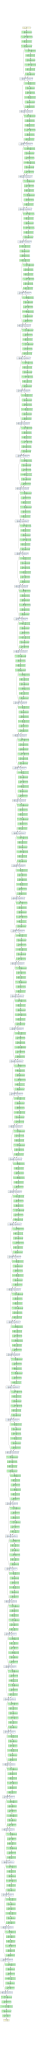

In [4]:
graph = draw_graph(model, x)
graph.visual_graph
